In [13]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import cv2  
from os import listdir 
from os.path import isfile, join 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
import random 


(1024, 1024)


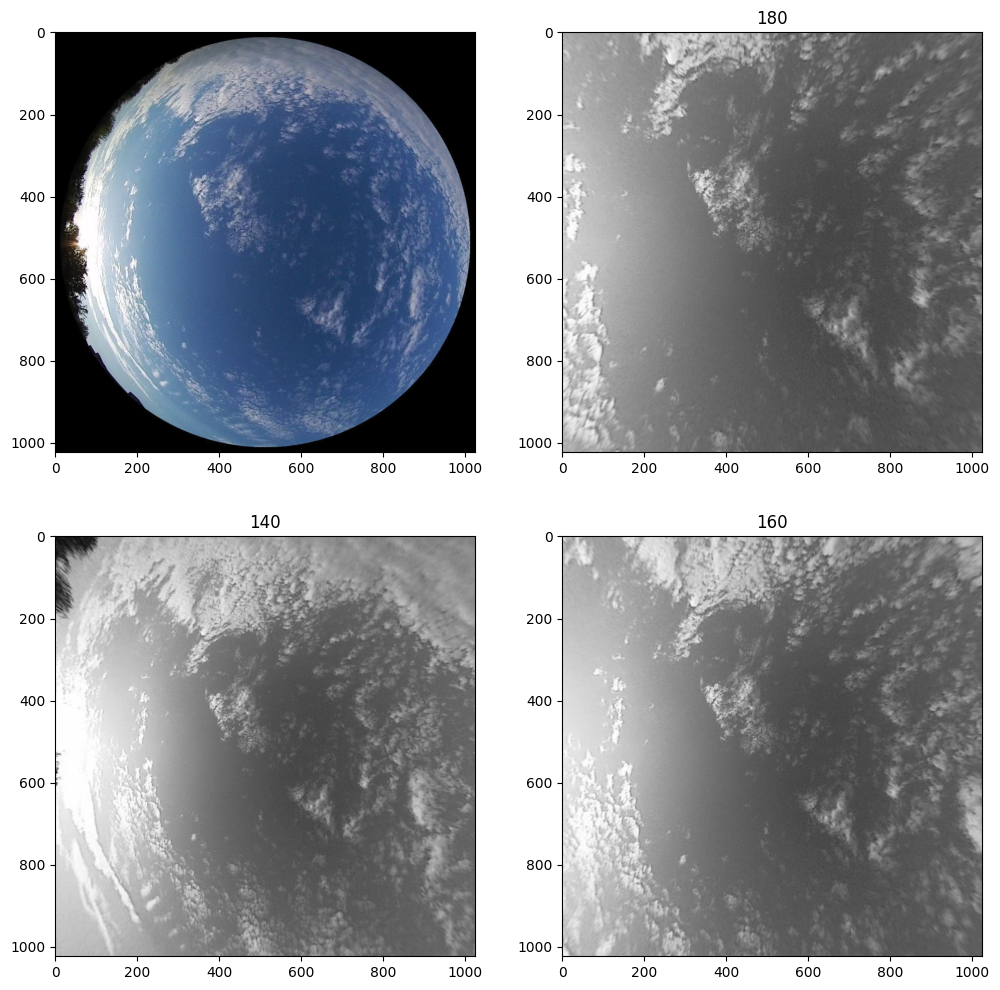

In [52]:



def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


img= "./TJNU-GRSCD/train/2_altocumulus/2_altocumulus_000053.jpg"

dtype = 'linear'
format = 'circular'
fov = 180
fov2=140
fov3=160
pfov = 120

image = cv2.imread(img)  
image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


obj = Defisheye(img, dtype=dtype, format=format, fov=fov, pfov=pfov)
obj2 = Defisheye(img, dtype=dtype, format=format, fov=fov2, pfov=pfov)
obj3 = Defisheye(img, dtype=dtype, format=format, fov=fov3, pfov=pfov)

new_image = obj.convert()
new_image= cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)

new_image2 = obj2.convert()
new_image2= cv2.cvtColor(new_image2, cv2.COLOR_BGR2GRAY)

new_image3 = obj3.convert()
new_image3= cv2.cvtColor(new_image3, cv2.COLOR_BGR2GRAY)



fig, axes= plt.subplots(2,2,figsize=(12,12)) 
axes=axes.flat

axes[0].imshow(image)
axes[1].imshow(new_image,cmap='Greys_r')
axes[1].set_title(f'{fov}')
axes[2].imshow(new_image2,cmap='Greys_r')
axes[2].set_title(f'{fov2}')
axes[3].imshow(new_image3,cmap='Greys_r')
axes[3].set_title(f'{fov3}')


print(new_image2.shape)

In [ ]:
# def transform_raw_image(image_file, fov): 
#     """
#     using the openCV and defisheye libraries convertes a fisheye image to rectilinear image and converts it from bgr to grey scale 
#     Returns the image as an numpy array 
#     """
#     image = cv2.imread(image_file)
#     dtype = 'linear'
#     format = 'circular'
#     pfov = 120
#     obj = Defisheye(img, dtype=dtype, format=format, fov=fov, pfov=pfov)
#     new_image = obj.convert()
#     new_image= cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
#     return new_image
    
    

In [ ]:
# path= "./TJNU-GRSCD"
# path_test=path+"/test"
# path_train=path+"/train" 

# class_dir_test=listdir(path_test)
# class_dir_train=listdir(path_train)

# test_addresses=[]
# training_addresses=[]
# class_names=[]

# for dir in class_dir_test: 
#     test_addresses.append(listdir(path_test+"/"+dir))
#     class_names.append(dir[2:])
# for dir in class_dir_train: 
#     training_addresses.append(listdir(path_train+"/"+dir))


# support_dir=[ len(x) for x in test_addresses ]
# train_support=[ len(x) for x in training_addresses ]

# print("test:", support_dir)
# print("train:",train_support)
# print("combined:", np.array(support_dir)+np.array(train_support))
# print("classes:",class_names)






test: [748, 331, 673, 688, 463, 587, 510]
train: [690, 400, 650, 650, 500, 600, 510]
combined: [1438  731 1323 1338  963 1187 1020]
clases: ['cumulus', 'altocumulus', 'cirrus', 'clearsky', 'stratocumulus', 'cumulonimbus', 'mixed']


In [ ]:
# # Randomly selecting 10% of training data. 
# nsample_category= np.array([int(len(x)//10) for x in training_addresses ]) 

# seed(42)# set randomseed  

# transformed_data_path="./slask/" 

# fovs=[140,160,180]

# for i in range(len(class_names)): 
#     subSample = sample(training_addresses[i], nsample_category[i]) 
#     datadir= transformed_data_path+class_names[i]
#     for fov in fovs: 
#         current_datadir=datadir+f"{fov}/"
        
#         Path(current_datadir ).mkdir(parents=True, exist_ok=True) 
        
#         for sample in subSample: 
#             image=transform_raw_image(sample, fov)
#             cv2.imwrite(current_datadir+sample, image)





TypeError: 'str' object is not callable

In [6]:
dirpath="./CCSN_v2"
class_dirs=listdir(dirpath)
lists_image_names=[]
for dir in class_dirs: 
    lists_image_names.append(listdir(dirpath+"/"+dir))


images= []
y=[] 
for  i in range(len(class_dirs)): 
    for image_name in lists_image_names[i]: 
        images.append(  cv2.imread( dirpath+"/"+class_dirs[i]+"/"+image_name ) ) 



array([[<Axes: title={'center': 'image_size'}>]], dtype=object)

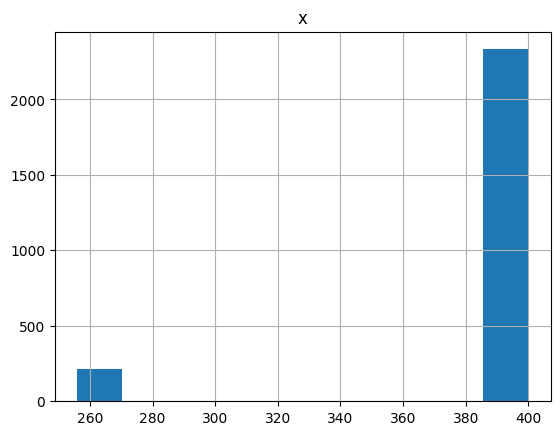

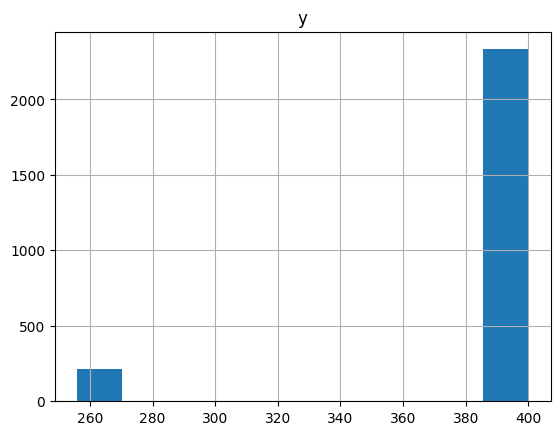

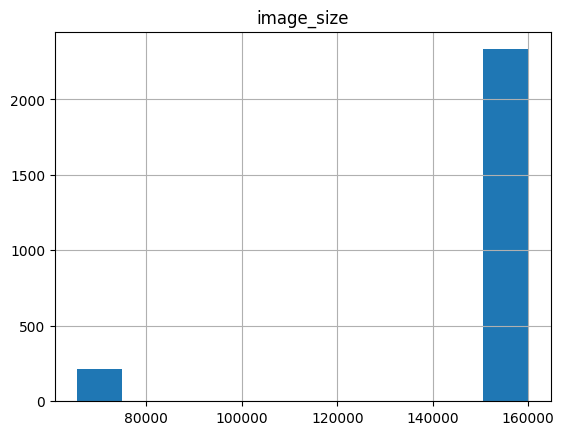

In [24]:
sizes=[M.shape for M in images] 

data= pd.DataFrame(sizes)

data=data.rename(columns={0: "x", 1: "y", 2: "z"})
data.head()


data.hist(column="x")
data.hist(column="y")

data['image_size']= data['x']*data['y']
data.hist(column='image_size')

